In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, ast, textwrap, os, math, re
data = []

# Data transcribed from user's LaTeX table (seed=1)
# Format: (n, instance, fairness, obj, route_times, stops)
rows = [
    (50, "instance31_nreq50_gamma50", "Jain", 2531.78, [1864, 663], [80,20]),
    (50, "instance31_nreq50_gamma50", "Max-min", 2543.71, [1864, 663], [80,20]),
    (50, "instance31_nreq50_gamma50", "Gini", 2533.16, [1864, 663], [80,20]),

    (50, "instance32_nreq50_gamma45", "Jain", 2020.37, [1336, 681], [56,34]),
    (50, "instance32_nreq50_gamma45", "Max-min", 2020.81, [951, 1066], [40,50]),
    (50, "instance32_nreq50_gamma45", "Gini", 2052.30, [1331, 716], [54,36]),

    (50, "instance33_nreq50_gamma45", "Jain", 2151.89, [779, 1370], [36,54]),
    (50, "instance33_nreq50_gamma45", "Max-min", 2167.75, [984, 1177], [38,52]),
    (50, "instance33_nreq50_gamma45", "Gini", 2182.84, [1188, 993], [48,42]),

    (50, "instance34_nreq50_gamma47", "Jain", 2486.71, [1789, 686], [68,26]),
    (50, "instance34_nreq50_gamma47", "Max-min", 2473.06, [1237, 1236], [48,46]),
    (50, "instance34_nreq50_gamma47", "Gini", 2490.75, [1789, 686], [68,26]),

    (100, "instance31_nreq100_gamma86", "Jain", 5359.33, [1753, 3598], [64,108]),
    (100, "instance31_nreq100_gamma86", "Max-min", 5423.66, [2682, 2740], [84,88]),
    (100, "instance31_nreq100_gamma86", "Gini", 5364.51, [1753, 3598], [64,108]),

    (100, "instance36_nreq100_gamma90", "Jain", 5661.51, [314, 5325], [12,168]),
    (100, "instance36_nreq100_gamma90", "Max-min", 5703.22, [4030, 1643], [120,60]),
    (100, "instance36_nreq100_gamma90", "Gini", 5661.67, [314, 5325], [12,168]),

    (100, "instance41_nreq100_gamma86", "Jain", 4768.07, [2478, 2290], [90,82]),
    (100, "instance41_nreq100_gamma86", "Max-min", 4769.19, [1631, 3117], [72,100]),
    (100, "instance41_nreq100_gamma86", "Gini", 4734.17, [2242, 2491], [84,88]),

    (100, "instance46_nreq100_gamma92", "Jain", 5899.07, [2810, 3089], [82,102]),
    (100, "instance46_nreq100_gamma92", "Max-min", 5929.88, [2925, 3004], [80,104]),
    (100, "instance46_nreq100_gamma92", "Gini", 5900.38, [3193, 2706], [104,80]),

    (200, "instance31_nreq200_gamma192", "Jain", 18342.61, [1181, 3488, 6877, 6738], [36,88,126,134]),
    (200, "instance31_nreq200_gamma192", "Max-min", 18764.59, [0, 0, 18490, 0], [0,0,384,0]),
    (200, "instance31_nreq200_gamma192", "Gini", 18205.81, [6554, 5274, 4654, 1666], [116,106,114,48]),

    (200, "instance36_nreq200_gamma181", "Jain", 15661.70, [4737, 3619, 2956, 4339], [104,92,78,88]),
    (200, "instance36_nreq200_gamma181", "Max-min", 16499.53, [0, 16137, 0, 0], [0,362,0,0]),
    (200, "instance36_nreq200_gamma181", "Gini", 15718.67, [5581, 947, 4374, 4734], [126,36,86,114]),

    (200, "instance41_nreq200_gamma196", "Jain", 17953.22, [3954, 5681, 4575, 3734], [82,132,88,90]),
    (200, "instance41_nreq200_gamma196", "Max-min", 18873.23, [0, 0, 0, 18539], [0,0,0,392]),
    (200, "instance41_nreq200_gamma196", "Gini", 18053.55, [3548, 6074, 3095, 5287], [78,118,80,116]),

    (200, "instance46_nreq200_gamma178", "Jain", 15210.94, [5250, 3601, 2874, 3458], [124,72,84,76]),
    (200, "instance46_nreq200_gamma178", "Max-min", 16125.64, [0, 0, 0, 15581], [0,0,0,356]),
    (200, "instance46_nreq200_gamma178", "Gini", 15274.49, [1210, 4722, 5385, 3837], [36,86,130,104]),
]

def fairness_value(route_times, measure):
    rt = np.array(route_times, dtype=float)
    m = len(rt)
    if m == 0:
        return 0.0
    if measure.lower().startswith("jain"):
        s = rt.sum()
        denom = m * np.sum(rt**2)
        return 0.0 if denom == 0 else (s**2)/denom
    if measure.lower().startswith("max"):
        mx = rt.max()
        mn = rt.min()
        return 0.0 if mx <= 0 else mn/mx
    if measure.lower().startswith("gini"):
        s = rt.sum()
        if s <= 0:
            return 0.0
        num = np.sum(np.abs(rt.reshape(-1,1)-rt.reshape(1,-1)))
        denom = 2*m*s
        g = 1 - num/denom
        return float(np.clip(g,0,1))
    raise ValueError(measure)

for n, inst, meas, obj, rt, st in rows:
    data.append({
        "n": n, "instance": inst, "measure": meas, "obj": obj,
        "route_times": rt, "stops": st, "fairness_value": fairness_value(rt, meas)
    })

df = pd.DataFrame(data)
df.head(), df.shape



(    n                   instance  measure      obj  route_times     stops  \
 0  50  instance31_nreq50_gamma50     Jain  2531.78  [1864, 663]  [80, 20]   
 1  50  instance31_nreq50_gamma50  Max-min  2543.71  [1864, 663]  [80, 20]   
 2  50  instance31_nreq50_gamma50     Gini  2533.16  [1864, 663]  [80, 20]   
 3  50  instance32_nreq50_gamma45     Jain  2020.37  [1336, 681]  [56, 34]   
 4  50  instance32_nreq50_gamma45  Max-min  2020.81  [951, 1066]  [40, 50]   
 
    fairness_value  
 0        0.815741  
 1        0.355687  
 2        0.762366  
 3        0.904604  
 4        0.892120  ,
 (36, 7))

/var/folders/s4/jjydc80j5k72df06dkmdylmr0000gn/T/ipykernel_61269/427351826.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(values, labels=labels, showfliers=True)


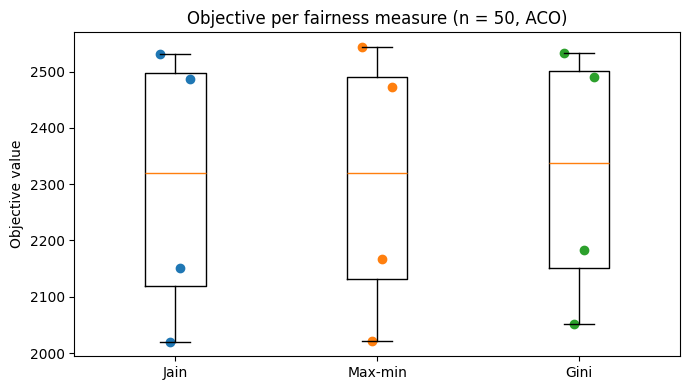

/var/folders/s4/jjydc80j5k72df06dkmdylmr0000gn/T/ipykernel_61269/427351826.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(values, labels=labels, showfliers=True)


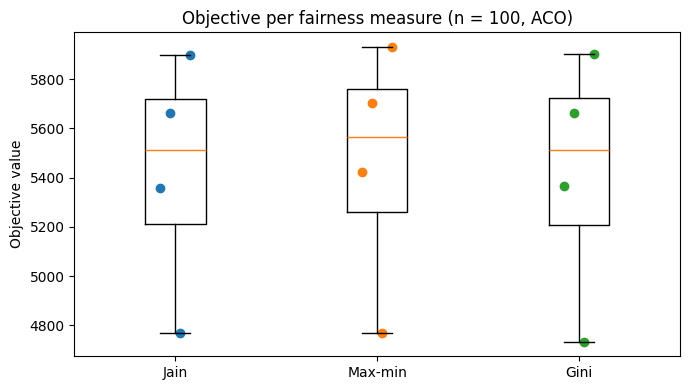

/var/folders/s4/jjydc80j5k72df06dkmdylmr0000gn/T/ipykernel_61269/427351826.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(values, labels=labels, showfliers=True)


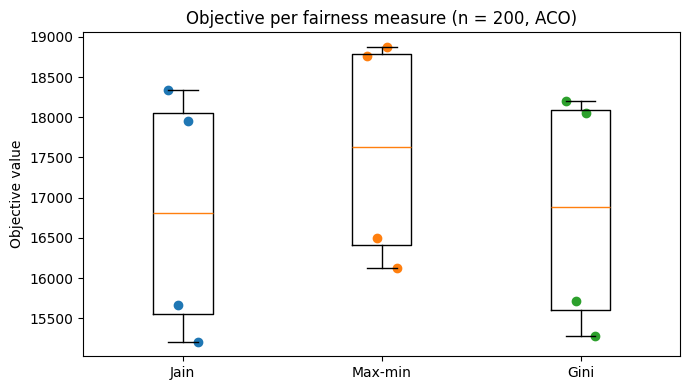

In [2]:
import matplotlib.pyplot as plt

# ======================
# n = 50
# ======================
data_50 = {
    "Jain":    [2531.78, 2020.37, 2151.89, 2486.71],
    "Max-min": [2543.71, 2020.81, 2167.75, 2473.06],
    "Gini":    [2533.16, 2052.30, 2182.84, 2490.75],
}

# ======================
# n = 100
# ======================
data_100 = {
    "Jain":    [5359.33, 5661.51, 4768.07, 5899.07],
    "Max-min": [5423.66, 5703.22, 4769.19, 5929.88],
    "Gini":    [5364.51, 5661.67, 4734.17, 5900.38],
}

# ======================
# n = 200
# ======================
data_200 = {
    "Jain":    [18342.61, 15661.70, 17953.22, 15210.94],
    "Max-min": [18764.59, 16499.53, 18873.23, 16125.64],
    "Gini":    [18205.81, 15718.67, 18053.55, 15274.49],
}


def plot_fairness_box(data, title):
    labels = list(data.keys())
    values = [data[k] for k in labels]

    plt.figure(figsize=(7, 4))

    plt.boxplot(values, labels=labels, showfliers=True)

    # overlay instance points
    for i, k in enumerate(labels, start=1):
        ys = data[k]
        xs = [i + (j - 1.5) * 0.05 for j in range(len(ys))]
        plt.scatter(xs, ys)

    plt.ylabel("Objective value")
    plt.title(title)
    plt.tight_layout()
    plt.show()


# ---- plots ----
plot_fairness_box(data_50,  "Objective per fairness measure (n = 50, ACO)")
plot_fairness_box(data_100, "Objective per fairness measure (n = 100, ACO)")
plot_fairness_box(data_200, "Objective per fairness measure (n = 200, ACO)")


/var/folders/s4/jjydc80j5k72df06dkmdylmr0000gn/T/ipykernel_61269/4168083370.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(values, labels=labels, showfliers=True)
/var/folders/s4/jjydc80j5k72df06dkmdylmr0000gn/T/ipykernel_61269/4168083370.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(values, labels=labels, showfliers=True)
/var/folders/s4/jjydc80j5k72df06dkmdylmr0000gn/T/ipykernel_61269/4168083370.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(values, labels=labels, showfliers=True)


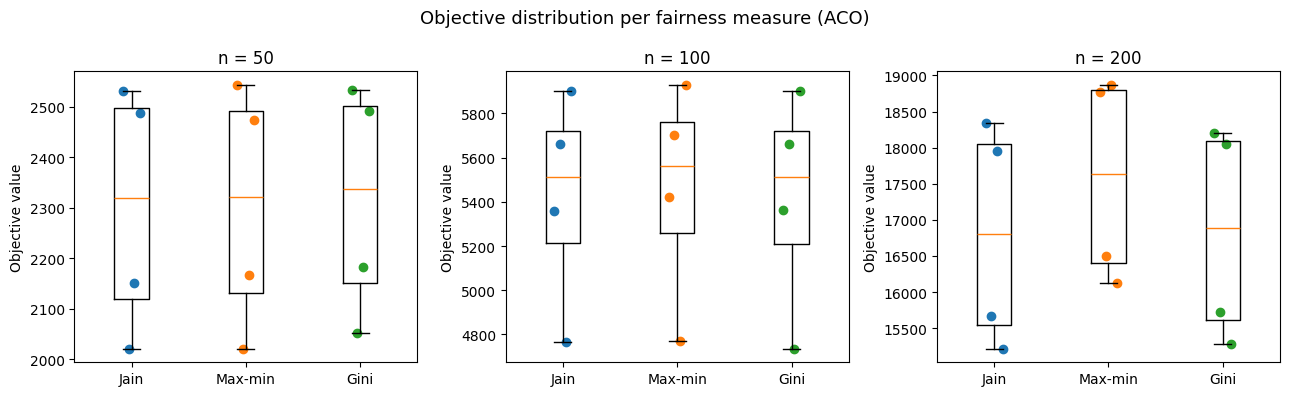

In [3]:
import matplotlib.pyplot as plt

# ======================
# data
# ======================
data_50 = {
    "Jain":    [2531.78, 2020.37, 2151.89, 2486.71],
    "Max-min": [2543.71, 2020.81, 2167.75, 2473.06],
    "Gini":    [2533.16, 2052.30, 2182.84, 2490.75],
}

data_100 = {
    "Jain":    [5359.33, 5661.51, 4768.07, 5899.07],
    "Max-min": [5423.66, 5703.22, 4769.19, 5929.88],
    "Gini":    [5364.51, 5661.67, 4734.17, 5900.38],
}

data_200 = {
    "Jain":    [18342.61, 15661.70, 17953.22, 15210.94],
    "Max-min": [18764.59, 16499.53, 18873.23, 16125.64],
    "Gini":    [18205.81, 15718.67, 18053.55, 15274.49],
}


def plot_subplot(ax, data, title):
    labels = list(data.keys())
    values = [data[k] for k in labels]

    ax.boxplot(values, labels=labels, showfliers=True)

    # overlay instance points
    for i, k in enumerate(labels, start=1):
        ys = data[k]
        xs = [i + (j - 1.5) * 0.05 for j in range(len(ys))]
        ax.scatter(xs, ys)

    ax.set_title(title)
    ax.set_ylabel("Objective value")


# ======================
# combined figure
# ======================
fig, axes = plt.subplots(1, 3, figsize=(13, 4), sharey=False)

plot_subplot(axes[0], data_50,  "n = 50")
plot_subplot(axes[1], data_100, "n = 100")
plot_subplot(axes[2], data_200, "n = 200")

fig.suptitle("Objective distribution per fairness measure (ACO)", fontsize=13)
plt.tight_layout()
plt.show()
